# Question 4 예측 모델을 돌려보자!!

## 데이터 로드

In [12]:
import pandas as pd

df = pd.read_csv("./preprocessing_q4.csv")
df.head()

,Unnamed: 0,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
0,0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,...,0,0,0,0,1,0,0,0,0,0
1,1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,...,0,0,0,0,0,0,0,0,1,0
2,2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,...,0,0,0,0,1,0,0,0,0,0
3,3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,...,0,0,0,0,1,0,0,0,0,0
4,4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,...,0,0,0,1,0,0,0,0,0,0


In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.describe()

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
count,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.0,...,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000
mean,3.857323,4.331202,74.562815,0.004492,1018.411966,8.675928,14.513312,11.815584,179.663974,2015.0,...,0.049057,0.028685,0.075401,0.028451,0.024470,0.138391,0.014401,0.062171,0.023065,0.048121
std,11.351268,12.370641,18.280534,0.037346,7.438663,11.739865,3.839898,8.466212,120.084638,0.0,...,0.216001,0.166930,0.264053,0.166267,0.154513,0.345330,0.119144,0.241479,0.150119,0.214034
min,-32.200000,0.000000,16.000000,0.000000,995.000000,-28.800000,0.100000,0.500000,0.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.800000,0.000000,62.000000,0.000000,1013.300000,0.000000,16.100000,5.600000,80.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,77.000000,0.000000,1018.300000,10.000000,16.100000,11.100000,180.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.300000,0.000000,90.000000,0.000000,1023.200000,18.300000,16.100000,16.700000,300.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.800000,64.800000,100.000000,1.430000,1044.400000,33.800000,16.100000,48.200000,360.000000,2015.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# train, test 데이터 분리 & 정규화

In [15]:
ml_cols = df.columns.tolist()
target_cols = ["UnivClass_Ciara", "UnivLab_Cesar"]
for i in target_cols:
    ml_cols.remove(i)
ml_cols

['Dew PointC',
 'Gust SpeedKm/h',
 'Humidity',
 'Precipitationmm',
 'Sea Level PressurehPa',
 'TemperatureC',
 'VisibilityKm',
 'Wind SpeedKm/h',
 'WindDirDegrees',
 'year',
 'month',
 'day',
 'hour',
 'Conditions_Blowing Snow',
 'Conditions_Clear',
 'Conditions_Fog',
 'Conditions_Haze',
 'Conditions_Heavy Rain',
 'Conditions_Heavy Snow',
 'Conditions_Heavy Thunderstorms and Rain',
 'Conditions_Ice Crystals',
 'Conditions_Light Freezing Fog',
 'Conditions_Light Freezing Rain',
 'Conditions_Light Rain',
 'Conditions_Light Rain Showers',
 'Conditions_Light Snow',
 'Conditions_Light Snow Showers',
 'Conditions_Light Thunderstorms and Rain',
 'Conditions_Mist',
 'Conditions_Mostly Cloudy',
 'Conditions_Overcast',
 'Conditions_Partly Cloudy',
 'Conditions_Patches of Fog',
 'Conditions_Rain',
 'Conditions_Scattered Clouds',
 'Conditions_Small Hail',
 'Conditions_Snow',
 'Conditions_Thunderstorm',
 'Conditions_Thunderstorms and Rain',
 'Conditions_Unknown',
 'Events_Fog',
 'Events_Fog-Rain',


In [16]:
import warnings
warnings.filterwarnings("ignore")

## 모델 선택
* target 값이 continuous value 라서 Regression 회귀 모델을 사용해 예측
* r2 score로 간단하게 적합도 측정

In [17]:
def train_r2(model, ml_cols, target_col):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score

    X_train, X_test, y_train, y_test = train_test_split(df[ml_cols], df[target_col], test_size=0.2,
                                                    shuffle=True, random_state=0)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    score = r2_score(y_test, preds)
    return print("{}의 r2 score은 : ".format(model), score)

### KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
train_r2(knn_model, ml_cols, "UnivClass_Ciara")

KNeighborsRegressor()의 r2 score은 :  0.40539434799107643


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
train_r2(dt_model, ml_cols, "UnivClass_Ciara")

DecisionTreeRegressor()의 r2 score은 :  0.6760053560937889


### Random Forest REgressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_r2(rf_model, ml_cols, "UnivClass_Ciara")

RandomForestRegressor()의 r2 score은 :  0.8378868654598802


random forest 모델이 가장 적합도가 높음!!
나머지 cesar lab 결과 확인

In [21]:
train_r2(rf_model, ml_cols, "UnivLab_Cesar")

RandomForestRegressor()의 r2 score은 :  0.7883981570167498


class_ciara와 lab_cesar의 적합도 차이가 대략 4% 정도 차이가 있음 각 공간별로 월별 에너지 변화를 확인해보자

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["seaborn-white"])

# 월 기준으로 에너지 평균 값 시각화
def time_avg(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    df_plot = dataframe.groupby(time).mean().reset_index()
    max_val = np.ceil(max(max(df["UnivClass_Ciara"]), max(df["UnivLab_Cesar"])))

    g1 = sns.barplot(data=df_plot, ax=ax[0], x=time, y="UnivClass_Ciara")
    for p in g1.patches:
        g1.annotate('%.00f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')



    g2 = sns.barplot(data=df_plot, ax=ax[1], x=time, y="UnivLab_Cesar")
    for p in g2.patches:
        g2.annotate('%.00f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    plt.ylim(0, max_val)

    ax[0].set_title("UnivClass_Ciara")
    ax[1].set_title("UnivLab_Cesar")

    plt.show()

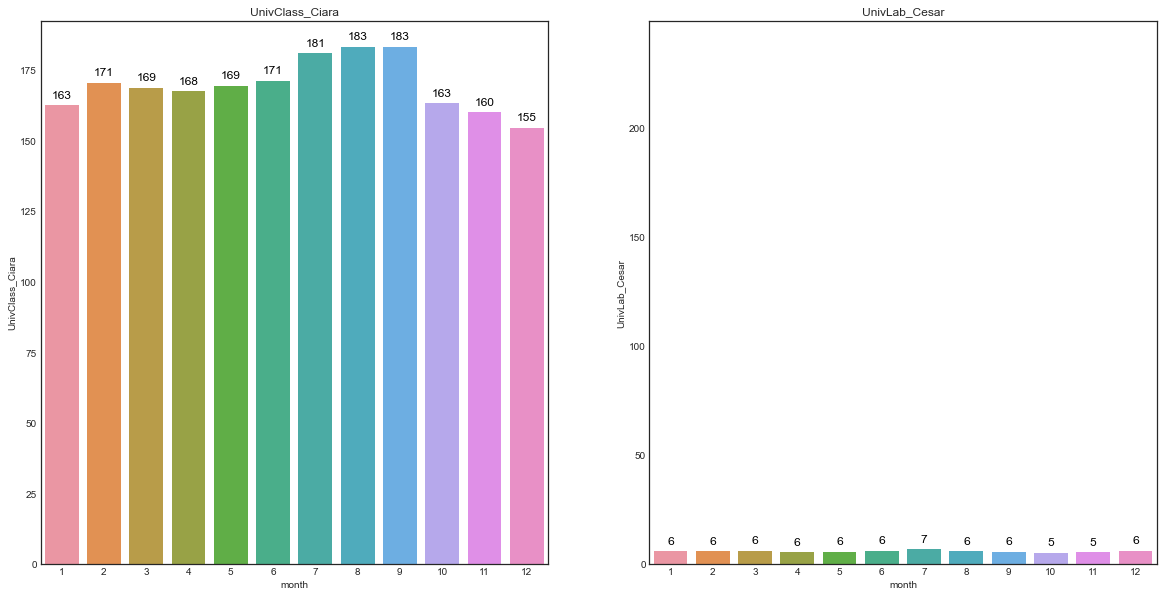

In [30]:
time_avg("month", df)

In [39]:
def time_avg_box(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    max_val = np.ceil(max(max(df["UnivClass_Ciara"]), max(df["UnivLab_Cesar"])))

    sns.boxplot(data=dataframe, ax=ax[0], x=time, y="UnivClass_Ciara")

    sns.boxplot(data=dataframe, ax=ax[1], x=time, y="UnivLab_Cesar")


    ax[0].set_title("UnivClass_Ciara")
    ax[1].set_title("UnivLab_Cesar")

    plt.ylim(0, max_val)
    plt.show()

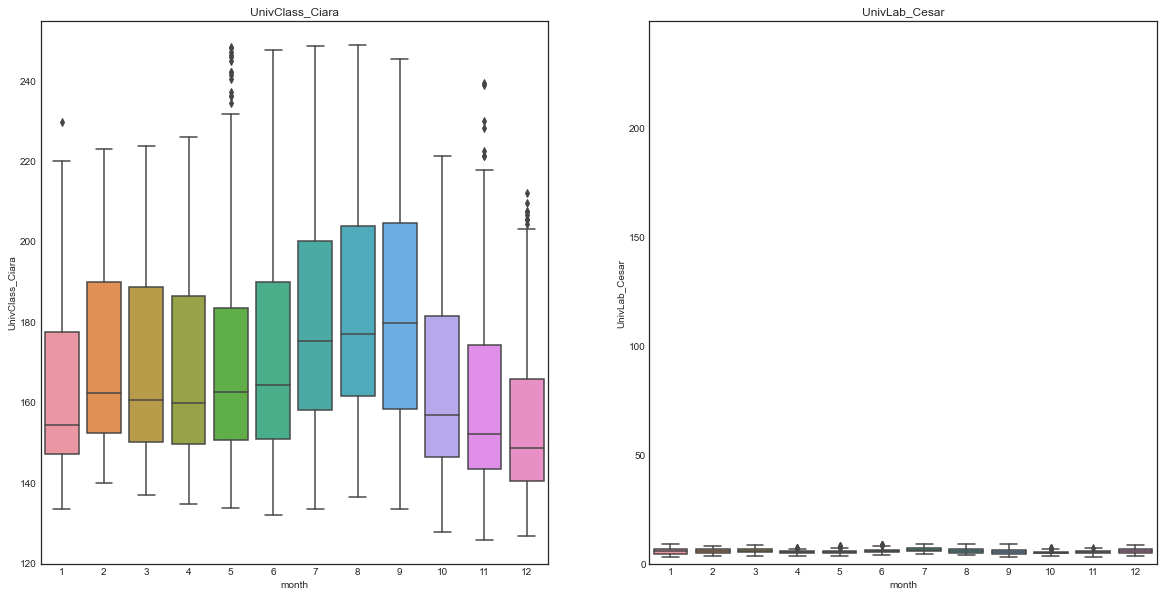

In [40]:
time_avg_box("month", df)

위의 boxplot을 보면 class_ciara와 lab_cesar의 자료 분산 정도의 차이가 있음 -> 자료의 구성형태에 따라 모델의 예측성능에 영향을 미치는 확인해보자
앞서 r2score 결정계수로 적합도를 평가했는데 결정계수는 자료의 구성형태에 따라 값이 결정되는 특성이 있어 통계모델의 정확성에 관한 절대지표로 사용되지 않는다.
좀 더 정확한 모델 성능평가를 위해 rmsle의 모델 성능평가 진행해보자

## 모델 성능평가
RMSLE 평가를 위해 컬럼 추가

In [41]:
df

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,2015,...,0,0,0,0,1,0,0,0,0,0
1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,2015,...,0,0,0,0,0,0,0,0,1,0
2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,2015,...,0,0,0,0,1,0,0,0,0,0
3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,2015,...,0,0,0,0,1,0,0,0,0,0
4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,2015,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,-1.0,0.0,100.0,0.0,1019.2,-1.0,16.1,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0
8537,-2.0,0.0,93.0,0.0,1019.2,-1.0,8.0,13.0,330,2015,...,0,0,0,0,0,0,0,0,0,0
8538,-1.0,0.0,100.0,0.0,1019.5,-1.0,6.4,14.8,330,2015,...,0,0,0,0,0,0,0,0,0,0
8539,-1.0,0.0,100.0,0.0,1019.2,-1.0,6.4,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df['UnivClass_Ciara_log'] = np.log(df['UnivClass_Ciara'] + 1)
df['UnivLab_Cesar_log'] = np.log(df['UnivLab_Cesar'] + 1)
df

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West,UnivClass_Ciara_log,UnivLab_Cesar_log
0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,2015,...,0,0,1,0,0,0,0,0,4.925985,1.795917
1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,2015,...,0,0,0,0,0,0,1,0,4.976906,1.722767
2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,2015,...,0,0,1,0,0,0,0,0,4.982750,1.749200
3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,2015,...,0,0,1,0,0,0,0,0,4.965464,1.740466
4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,2015,...,0,1,0,0,0,0,0,0,5.005288,1.718292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,-1.0,0.0,100.0,0.0,1019.2,-1.0,16.1,9.3,330,2015,...,0,0,0,0,0,0,0,0,4.942178,2.180417
8537,-2.0,0.0,93.0,0.0,1019.2,-1.0,8.0,13.0,330,2015,...,0,0,0,0,0,0,0,0,4.936091,2.145931
8538,-1.0,0.0,100.0,0.0,1019.5,-1.0,6.4,14.8,330,2015,...,0,0,0,0,0,0,0,0,4.932674,1.935138
8539,-1.0,0.0,100.0,0.0,1019.2,-1.0,6.4,9.3,330,2015,...,0,0,0,0,0,0,0,0,4.958816,2.060514


<img src="./rmsle.png">

In [43]:
def get_rmsle(y_actual, y_pred):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [44]:
ml_cols = df.columns.tolist()
target_cols = ["UnivClass_Ciara", "UnivLab_Cesar", "UnivClass_Ciara_log", "UnivLab_Cesar_log"]
for i in target_cols:
    ml_cols.remove(i)
ml_cols

['Dew PointC',
 'Gust SpeedKm/h',
 'Humidity',
 'Precipitationmm',
 'Sea Level PressurehPa',
 'TemperatureC',
 'VisibilityKm',
 'Wind SpeedKm/h',
 'WindDirDegrees',
 'year',
 'month',
 'day',
 'hour',
 'Conditions_Blowing Snow',
 'Conditions_Clear',
 'Conditions_Fog',
 'Conditions_Haze',
 'Conditions_Heavy Rain',
 'Conditions_Heavy Snow',
 'Conditions_Heavy Thunderstorms and Rain',
 'Conditions_Ice Crystals',
 'Conditions_Light Freezing Fog',
 'Conditions_Light Freezing Rain',
 'Conditions_Light Rain',
 'Conditions_Light Rain Showers',
 'Conditions_Light Snow',
 'Conditions_Light Snow Showers',
 'Conditions_Light Thunderstorms and Rain',
 'Conditions_Mist',
 'Conditions_Mostly Cloudy',
 'Conditions_Overcast',
 'Conditions_Partly Cloudy',
 'Conditions_Patches of Fog',
 'Conditions_Rain',
 'Conditions_Scattered Clouds',
 'Conditions_Small Hail',
 'Conditions_Snow',
 'Conditions_Thunderstorm',
 'Conditions_Thunderstorms and Rain',
 'Conditions_Unknown',
 'Events_Fog',
 'Events_Fog-Rain',


In [45]:
def train_rmsle(model, ml_cols, target_col):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    X_train, X_test, y_train, y_test = train_test_split(df[ml_cols], df[target_col], test_size=0.2,
                                                    shuffle=True, random_state=0)
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    score = get_rmsle(y_test, preds)
    return print("{}의 rmsle 값은 : ".format(model), score)

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_rmsle(rf_model, ml_cols, "UnivClass_Ciara_log")

RandomForestRegressor()의 rmsle 값은 :  0.009323843618126066


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
train_rmsle(rf_model, ml_cols, "UnivLab_Cesar_log")

RandomForestRegressor()의 rmsle 값은 :  0.023578104182703546


모델 성능평가에서도 class와 lab의 성능차이가 있다.
이번에 처리한 데이터로 만든 RF 모델의 경우 Class의 경우 상대적으로 높은 예측 성능을 나타내며 Lab의 경우 상대적으로 낮은 예측 성능을 나타낸다.
즉, 같은 날씨 데이터를 사용하더라도 class와 lab의 공간 특성에 따라 데이터 처리를 해줘야 예측 성능이 높게나올 수 있다.